<a href="https://colab.research.google.com/github/DianaCorderoF/ML_DCCF/blob/main/Tarea_5_dccf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   int6

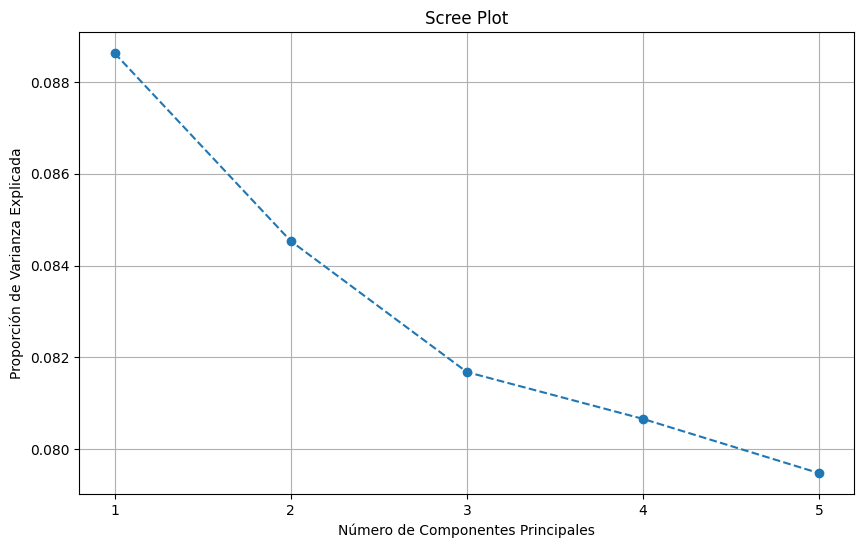

In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AA_DCCF/SPD2.csv')
df.head()
df.info()

# Separar las características y la variable objetivo
X = df.drop(columns=['GradeClass'])
y = df['GradeClass']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=5)  # Ajusta el número de componentes según sea necesario
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Número de componentes principales
num_components = pca.n_components_
print(f'Number of components: {num_components}')

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)

# Varianza explicada acumulada
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print('Cumulative explained variance:', cumulative_variance)

# Dimensiones de los datos transformados
print(f'Dimensions of transformed data: {X_train_pca.shape}')

# Obtener los componentes principales
components = pca.components_

# Crear un DataFrame para una mejor visualización
components_df = pd.DataFrame(components, columns=X.columns)
print(components_df)

# Entrenar el modelo de Gradient Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train_pca, y_train)

# Realizar predicciones
y_pred = gbc.predict(X_test_pca)

# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()